### Objectives
* Understanding target needn't always be one dimensional
* Work on face datset
* Half-part of the face data acts as feature & rest half as target
* Given top half of the face it will predict bottom half of the face

<hr>

### Understanding target needn't always be one dimensional
* Target can be more than one value

In [2]:
from sklearn.datasets import fetch_olivetti_faces

In [3]:
faces = fetch_olivetti_faces()

/home/awantik/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [5]:
# 400 images of 64 X 64
faces.images.shape

(400, 64, 64)

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
faces.images[0].shape

(64, 64)

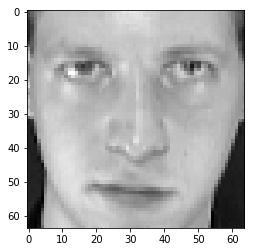

In [20]:
plt.imshow(faces.images[2], cmap='gray')

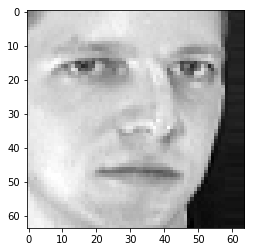

In [26]:
plt.imshow(faces.images[1], cmap='gray')

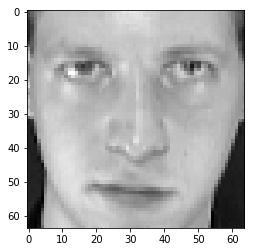

In [27]:
plt.imshow(faces.images[2], cmap='gray')

In [29]:
faces.target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

In [33]:
training_data = faces.images[faces.target < 30]

In [34]:
test_data = faces.images[faces.target > 30]

In [61]:
test_data.shape

(90, 64, 64)

### Splitting Data into feature data & target data
* Feature Data is top half of face
* Target Data is bottom half of face

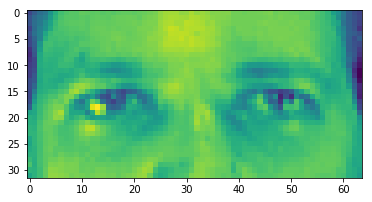

In [40]:
plt.imshow(training_data[0][0:32,:])

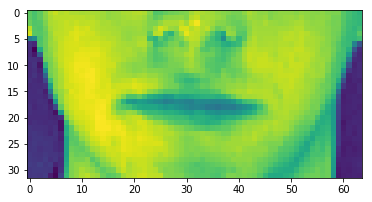

In [41]:
plt.imshow(training_data[0][32:,:])

In [43]:
training_data[0][32:,:].shape

(32, 64)

In [42]:
import numpy as np

* ML Algo don't accept 3D data but only 2D data
* Reshape below does this for us

In [63]:
trainX = training_data[:,:32,:].reshape(300,32*64)

In [64]:
trainY = training_data[:,32:,:].reshape(300,32*64)

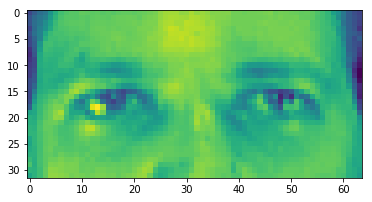

In [60]:
plt.imshow(trainX[0].reshape(32,64))

In [65]:
testX = test_data[:,:32,:].reshape(90,32*64)

In [66]:
testY = test_data[:,32:,:].reshape(90,32*64)

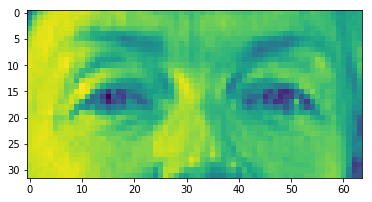

In [67]:
plt.imshow(testX[0].reshape(32,64))

* Target will be continues value (pixels)
* So, we need to use regressor

In [68]:
from sklearn.neighbors import KNeighborsRegressor

In [70]:
#n_jobs = -1, making use of all CPU cores
knr = KNeighborsRegressor(n_neighbors=5, n_jobs=-1)

In [71]:
knr.fit(trainX, trainY)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                    weights='uniform')

In [74]:
pred_face = knr.predict(testX[:1])

In [77]:
bottom_face = pred_face.reshape(32,64)

In [78]:
combined_face = np.vstack([testX[0].reshape(32,64), bottom_face])

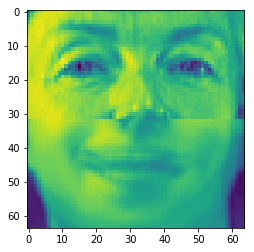

In [79]:
plt.imshow(combined_face)

In [80]:
trainY.shape

(300, 2048)

In [81]:
trainX.shape

(300, 2048)

# Questions
* How many features does feature data have ?
  - Number of features is 2048
  - 300 is number of data
  - 2048 axes will be required to represent in this data

* How many features does target data have ?
  - 2048  
  
* Think about how the target vector is calculated from neighbours

In [83]:
### Problem Statement

In [84]:
import pandas as pd

In [90]:
#Datset = http://archive.ics.uci.edu/ml/datasets/Bank+Marketing
bank_data = pd.read_csv('/home/awantik/Downloads/bank/bank.csv', sep=';')

In [89]:
bank_data.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
793,49,management,divorced,tertiary,no,1405,no,no,unknown,8,jun,29,1,-1,0,unknown,no
1406,44,admin.,single,secondary,no,2524,no,no,unknown,19,jun,82,1,-1,0,unknown,no
4037,42,management,divorced,tertiary,no,0,no,no,unknown,19,may,131,2,-1,0,unknown,no
2354,34,management,single,secondary,no,0,no,no,cellular,22,aug,132,4,-1,0,unknown,no
2404,52,entrepreneur,married,primary,no,592,no,no,cellular,21,jul,122,2,-1,0,unknown,no
1343,47,technician,married,secondary,no,1233,yes,no,unknown,11,sep,91,1,100,2,other,yes
3925,48,technician,married,secondary,no,17,yes,yes,cellular,17,nov,81,1,-1,0,unknown,no
3260,45,admin.,married,primary,no,542,no,no,cellular,11,may,8,5,350,3,other,no
3857,50,entrepreneur,married,tertiary,no,433,yes,no,cellular,18,may,47,4,-1,0,unknown,no
1338,52,services,married,secondary,no,-888,no,no,cellular,16,jul,135,1,-1,0,unknown,no


### Try understand the data

### As we know categorical columns cannot be used for model training
* Try exploring LabelEncoder for concerting the categorical columns into numbers before training the model